### Dining Data Deep Dive
### LEVEL 1: Data Exploration & Preprocessing, Descriptive Analysis, Geospatial Analysis


We’ll explore the restaurant dataset, clean up messy data, and check for missing values. We’ll also analyze the ratings and identify trends in different cities and cuisines. Think of this as getting to know the data before making any big conclusions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df = pd.read_csv("Dataset.csv")

In [5]:
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (9551, 21)
Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True) 
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)  


In [ ]:
df['Aggregate rating'] = df['Aggregate rating'].astype('int')  

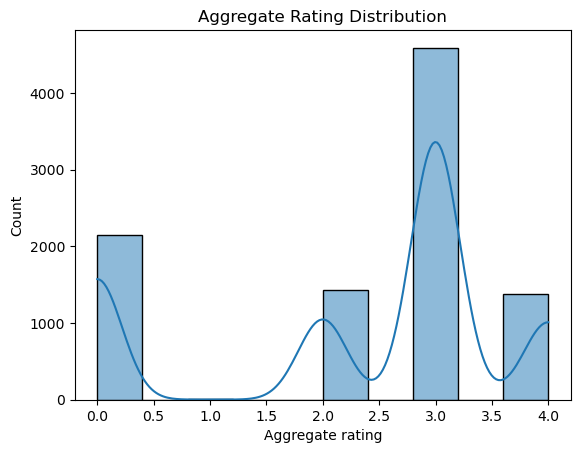

In [11]:
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Aggregate Rating Distribution")
plt.show()

In [12]:
print(df['Aggregate rating'].value_counts(normalize=True) * 100)

Aggregate rating
3    48.057795
0    22.489792
2    14.972254
4    14.448749
1     0.031410
Name: proportion, dtype: float64


In [13]:
print("\nBasic Statistics:\n", df.describe())
print("\nTop 10 Cuisines:\n", df['Cuisines'].value_counts().head(10))
print("\nTop 10 Cities:\n", df['City'].value_counts().head(10))


Basic Statistics:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.319443    156.909748  
std            16121.183073     0.905609          1.362565    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000 

In [14]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(map)

In [15]:
map.save("restaurant_locations.html")

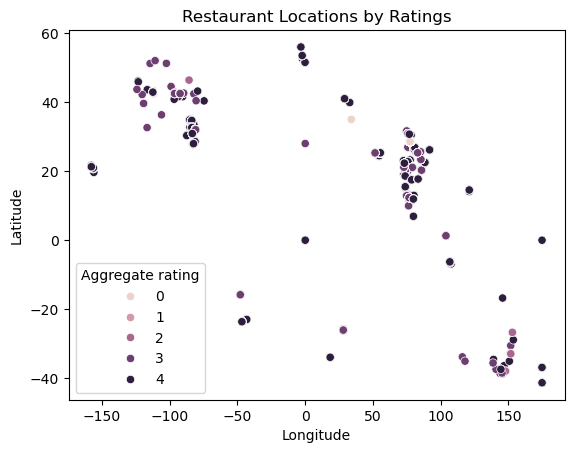

In [16]:
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['Aggregate rating'])
plt.title("Restaurant Locations by Ratings")
plt.show()

Conclusion:
We’ve successfully explored and cleaned the restaurant dataset, ensuring that it’s ready for deeper analysis. We now understand the structure of the data, have handled missing values, and gained insights into restaurant ratings, locations, and cuisines. With a solid foundation, we’re ready to uncover business trends!